# Replace Word

In [1]:
#import the edmund data and the car_models_and_brands.csv
from google.colab import files
uploaded = files.upload()

Saving car_models_and_brands.csv to car_models_and_brands.csv
Saving edmundsdata to edmundsdata


In [3]:
import pandas as pd

models_brand_df = pd.read_csv('car_models_and_brands.csv')

#creates dictionary from the two columns
model_to_brand = dict(zip(models_brand_df['Model'], models_brand_df['Brand']))

In [4]:
comments_df = pd.read_csv('edmundsdata')
df_cleaned = comments_df.dropna(subset=['comments'])

In [5]:
updated_comments = []
for comment in df_cleaned['comments']:
    comment_new = comment.lower()
    for model, brand in model_to_brand.items():
        comment_new = comment_new.replace(model, brand)
    updated_comments.append(comment_new)


df_cleaned['newcomments'] = updated_comments

<ipython-input-5-03ca1600d6db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['newcomments'] = updated_comments


# Zrif Law

In [6]:
from collections import Counter

word_frequencies = Counter()

for comment in df_cleaned['newcomments']:
    word_frequencies.update(comment.split())

print(word_frequencies.most_common())


[('the', 67375), ('a', 32276), ('and', 26682), ('to', 25603), ('i', 25232), ('is', 18958), ('of', 18047), ('in', 16751), ('that', 14256), ('you', 12177), ('for', 12170), ('it', 11965), ('car', 10062), ('with', 9735), ('on', 8561), ('but', 8478), ('not', 8074), ('my', 7741), ('have', 7521), ('as', 7413), ('are', 7413), ('bmw', 6555), ('be', 6547), ('if', 5438), ('or', 5416), ('was', 5374), ('they', 5089), ('at', 4982), ('this', 4689), ('an', 4418), ('like', 4309), ('more', 4115), ('than', 4085), ('about', 3987), ('-', 3927), ('just', 3779), ('has', 3746), ('would', 3702), ('all', 3681), ("it's", 3649), ('your', 3531), ('so', 3511), ('will', 3509), ('get', 3477), ('can', 3462), ('what', 3400), ('one', 3395), ('from', 3063), ("don't", 2888), ('out', 2744), ('think', 2693), ('do', 2682), ('me', 2665), ('when', 2642), ('no', 2561), ('tl', 2528), ('audi', 2512), ('acura', 2354), ('new', 2335), ('there', 2326), ('had', 2311), ('some', 2288), ("i'm", 2211), ('up', 2201), ('by', 2176), ('even',

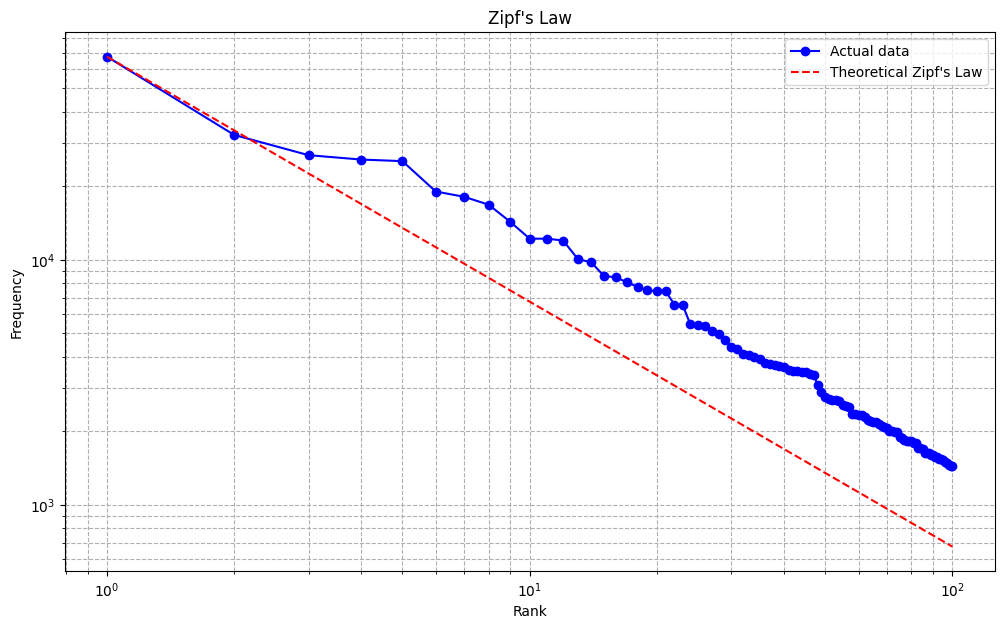

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get the most common words and their frequencies
most_common_words = word_frequencies.most_common(100)

# Separate words and their frequencies
ranks, frequencies = zip(*[(rank+1, freq) for rank, (word, freq) in enumerate(most_common_words)])

# Plotting the data
plt.figure(figsize=(12, 7))
plt.loglog(ranks, frequencies, marker="o", linestyle="-", color="b", label="Actual data")

theoretical_frequencies = [frequencies[0] / r for r in ranks]
plt.loglog(ranks, theoretical_frequencies, linestyle="--", color="r", label="Theoretical Zipf's Law")

plt.title("Zipf's Law")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


Top 10 Brands

In [8]:
from collections import defaultdict

brand_frequencies = {}
top500_most_common_words = word_frequencies.most_common(500)

# Iterate through word frequencies
for word, freq in top500_most_common_words:
    # Check if the word exists in the model_to_brand dictionary
    if word not in ['seat','problem','car']:
      if word in set(model_to_brand.values()):
          brand = word
          brand_frequencies[brand] = freq

In [9]:
brand_frequencies

{'bmw': 6555,
 'audi': 2512,
 'acura': 2354,
 'honda': 1532,
 'sedan': 1411,
 'infiniti': 1332,
 'toyota': 983,
 'nissan': 755,
 'subaru': 730,
 'volvo': 663,
 'mercedes-benz': 638,
 'volkswagen': 600,
 'dodge': 418,
 'cadillac': 411,
 'ford': 406,
 'lincoln': 377,
 'hyundai': 319,
 'suzuki': 279}

Top ten brands

In [10]:
top_ten_brands = list(brand_frequencies.keys())[0:10]

In [ ]:
#brands = ['bmw', 'audi', 'acura', 'honda', 'sedan', 'infiniti', 'toyota', 'nissan', 'subaru', 'volvo']
brands = ['bmw']

# Create a DataFrame to store the lift values
df_lift = pd.DataFrame(columns=['brand1', 'brand2', 'lift'])

# Iterate over the brands
for brand1 in brands:
    for brand2 in brands:
        # Get the number of comments that mention both brands
        n_brand1_brand2_comments = len(df_cleaned[df_cleaned['newcomments'].str.contains(brand1) & df_cleaned['newcomments'].str.contains(brand2)])
        print(n_brand1_brand2_comments)

        # Get the total number of comments
        n_total_comments = len(df_cleaned)
        print(n_total_comments)

        # Get the number of comments that mention brand1
        n_brand1_comments = len(df_cleaned[df_cleaned['newcomments'].str.contains(brand1)])
        print(n_brand1_comments)

        # Get the number of comments that mention brand2
        n_brand2_comments = len(df_cleaned[df_cleaned['newcomments'].str.contains(brand2)])
        print(n_brand2_comments)

        # Calculate the lift value
        lift_brand1_brand2 = (n_brand1_brand2_comments / n_total_comments) / (n_brand1_comments / n_total_comments) * (n_brand2_comments / n_total_comments)
        print(lift_brand1_brand2)

        # Add the lift value to the DataFrame
        df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)

# Sort the DataFrame by lift value
df_lift = df_lift.sort_values(by='lift', ascending=False)

# Print the DataFrame
print(df_lift)


4251
12476
4251
4251
0.34073420968259055
  brand1 brand2      lift
0    bmw    bmw  0.340734


<ipython-input-91-890f62c12c0f>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


In [11]:
import pandas as pd
brands = ['bmw', 'audi', 'acura', 'honda', 'sedan', 'infiniti', 'toyota', 'nissan', 'subaru', 'volvo']

# Create a DataFrame to store the lift values
df_lift = pd.DataFrame(columns=['brand1', 'brand2', 'lift'])

# Iterate over the brands
for brand1 in brands:
    for brand2 in brands:
        # Get the number of comments that mention both brands
        n_brand1_brand2_comments = len(df_cleaned[df_cleaned['newcomments'].str.contains(brand1) & df_cleaned['newcomments'].str.contains(brand2)])
        print(n_brand1_brand2_comments)

        # Get the total number of comments
        n_total_comments = len(df_cleaned)
        print(n_total_comments)

        # Get the number of comments that mention brand1
        n_brand1_comments = len(df_cleaned[df_cleaned['newcomments'].str.contains(brand1)])
        print(n_brand1_comments)

        # Get the number of comments that mention brand2
        n_brand2_comments = len(df_cleaned[df_cleaned['newcomments'].str.contains(brand2)])
        print(n_brand2_comments)

        # Calculate the lift value
        #lift_brand1_brand2 = (n_brand1_brand2_comments / n_total_comments) / (n_brand1_comments / n_total_comments) * (n_brand2_comments / n_total_comments)
        lift_brand1_brand2 = (n_total_comments * n_brand1_brand2_comments) / (n_brand1_comments * n_brand2_comments)
        print(lift_brand1_brand2)

        # Add the lift value to the DataFrame
        df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)

# Sort the DataFrame by lift value
df_lift = df_lift.sort_values(by='lift', ascending=False)

df_lift.head(100)



4251
12476
4251
4251
2.934838861444366
941
12476
4251
1667
1.6566786854344022
757
12476
4251
1736
1.2797655634293692
756
12476
4251
1736
1.2780749880483528


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

825
12476
4251
1659
1.4594587466495492
687
12476
4251
1188
1.6971669173504036
1627
12476
4251
3723
1.2825632091243577
266
12476
4251


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

712
1.0964426083485974
249
12476
4251
799
0.9146118604501215
225
12476
4251
482
1.3699973938277643
941
12476
1667
4251
1.6566786854344022


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


1667
12476
1667
1667
7.484103179364127
465
12476
1667


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


1736
2.004670494472534
336
12476
1667
1736
1.4485360992317666
318
12476
1667
1659
1.4345658897153661
345
12476
1667


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


1188
2.173413802088067
692
12476
1667
3723
1.3910822992532839
121
12476
1667
712
1.271877085257106
131
12476


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


1667
799
1.227055715264957
194
12476
1667
482
3.012273893768964
757
12476
1736
4251
1.2797655634293692
465
12476
1736
1667
2.004670494472534
1736
12476
1736
1736
7.186635944700461


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


548
12476
1736
1736
2.2685924525897767
342
12476
1736
1659
1.4815126540612162
458
12476
1736
1188
2.7706054399602786


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


727
12476
1736
3723
1.4033532988979949
191
12476
1736
712
1.9278756537047586
261
12476
1736
799
2.3475744450147937


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


155
12476
1736
482
2.3110551274451687
756
12476
1736
4251
1.2780749880483528
336
12476
1736


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

1667
1.4485360992317666
548
12476
1736
1736
2.2685924525897767
1736
12476
1736
1736
7.186635944700461
354
12476
1736
1659
1.533495554203715


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


247
12476
1736
1188
1.4941911433846917
958
12476
1736
3723
1.8492606057005214
225
12476
1736
712
2.2710577072438256
109
12476


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

1736
799
0.9804046532820403
109
12476
1736
482
1.625193605751764
825
12476
1659
4251
1.4594587466495492
318
12476
1659


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


1667
1.4345658897153661
342
12476
1659
1736
1.4815126540612162
354
12476
1659
1736
1.533495554203715
1659
12476
1659


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


1659
7.520192887281495
272
12476
1659
1188
1.7217950044954264
699
12476
1659
3723
1.411929849102811
149
12476
1659


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

712
1.5737482306249195
116
12476
1659
799
1.091792709542745
116
12476
1659
482
1.809838952125837
687
12476
1188
4251
1.6971669173504036


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


345
12476
1188
1667
2.173413802088067
458
12476
1188
1736
2.7706054399602786
247
12476
1188
1736
1.4941911433846917


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


272
12476
1188
1659
1.7217950044954264
1188
12476
1188
1188
10.501683501683502
504
12476
1188
3723
1.4216622306872106


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


189
12476
1188
712
2.7876659856996935
83
12476
1188
799
1.0909133049308268
98
12476
1188
482
2.135197060508264
1627
12476


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


3723
4251
1.2825632091243577
692
12476
3723
1667
1.3910822992532839
727
12476
3723
1736
1.4033532988979949
958
12476


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


3723
1736
1.8492606057005214
699
12476
3723
1659
1.411929849102811
504
12476
3723
1188
1.4216622306872106
3723
12476


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


3723
3723
3.3510609723341394
337
12476
3723
712
1.5861061062873665
256
12476
3723
799
1.0736816131633788
241
12476
3723


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

482
1.6755304861670697
266
12476
712
4251
1.0964426083485974
121
12476
712
1667
1.271877085257106
191
12476
712
1736
1.9278756537047586


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


225
12476
712
1736
2.2710577072438256
149
12476
712
1659
1.5737482306249195
189
12476
712
1188
2.7876659856996935


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


337
12476
712
3723
1.5861061062873665
712
12476
712
712
17.52247191011236
66
12476
712
799
1.4474131990831236
56
12476


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

712
482
2.035805865075295
249
12476
799
4251
0.9146118604501215
131
12476
799
1667
1.227055715264957
261
12476
799
1736
2.3475744450147937
109
12476
799
1736
0.9804046532820403
116
12476
799
1659
1.091792709542745
83
12476
799


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


1188
1.0909133049308268
256
12476
799
3723
1.0736816131633788
66
12476
799
712
1.4474131990831236
799
12476


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)


799
799
15.614518147684606
81
12476
799
482
2.6240165351918114
225
12476
482
4251
1.3699973938277643
194
12476
482
1667
3.012273893768964


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

155
12476
482
1736
2.3110551274451687
109
12476
482
1736
1.625193605751764
116
12476
482
1659
1.809838952125837
98
12476
482
1188
2.135197060508264


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

241
12476
482
3723
1.6755304861670697
56
12476
482
712
2.035805865075295
81
12476
482
799
2.6240165351918114
482
12476
482
482
25.883817427385893


<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_lift = df_lift.append({'brand1': brand1, 'brand2': brand2, 'lift': lift_brand1_brand2}, ignore_index=True)
<ipython-input-11-e0e6df4b5617>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

,brand1,brand2,lift
99,volvo,volvo,25.883817
77,nissan,nissan,17.522472
88,subaru,subaru,15.614518
55,infiniti,infiniti,10.501684
44,sedan,sedan,7.520193
...,...,...,...
68,toyota,subaru,1.073682
38,honda,subaru,0.980405
83,subaru,honda,0.980405
80,subaru,bmw,0.914612


TODO:

1) MDS code
2) Check lift values and figure out some ideas/thoughts
3) Someone to run the code, check the word frequenices and find top ten words dealing with aspiration (hope, want, love, etc)
4) create a write up

In [ ]:
#TODO

We need